# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

- Adam optimizer
- Epoch =20
- batch_size=128
- Removing Batch Normalization
- Cropped the image to 120*120
- lr for l2 changed to 0.005
- deactivated few layers of model

In [158]:
# pip install scipy

In [159]:
import numpy as np
import os
# from scipy.misc import imread, imresize
from skimage.io import imread
from skimage.transform import resize
import datetime
import os
import matplotlib.pyplot as plt

We set the random seed so that the results don't vary drastically.

In [160]:
# np.random.seed(30)
import random as rn
# rn.seed(30)
# from keras import backend as K
from tensorflow.keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [161]:
# train_doc = np.random.permutation(open('/notebooks/storage/Final_data/Collated_training/train.csv').readlines())
# val_doc = np.random.permutation(open('/notebooks/storage/Final_data/Collated_training/test.csv').readlines())

train_doc = np.random.permutation(open('D:/MS_in_ML_and_AI/Jupyter/Gesture Recognition/datasets/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('D:/MS_in_ML_and_AI/Jupyter/Gesture Recognition/datasets/Project_data/val.csv').readlines())
batch_size =8#experiment with the batch size

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [162]:
print(train_doc)

['WIN_20180926_17_10_34_Pro_Right_Swipe_new;Right_Swipe_new;1\n'
 'WIN_20180925_17_34_05_Pro_Thumbs_Down_new;Thumbs_Down_new;3\n'
 'WIN_20180926_17_18_43_Pro_Thumbs_Up_new;Thumbs_Up_new;4\n'
 'WIN_20180907_15_50_05_Pro_Left Swipe_new_Left Swipe_new;Left Swipe_new_Left Swipe_new;0\n'
 'WIN_20180925_17_51_23_Pro_Thumbs_Down_new;Thumbs_Down_new;3\n'
 'WIN_20180926_17_22_16_Pro_Thumbs_Up_new;Thumbs_Up_new;4\n'
 'WIN_20180926_17_35_35_Pro_Thumbs_Down_new;Thumbs_Down_new;3\n'
 'WIN_20180907_16_07_57_Pro_Left Swipe_new_Left Swipe_new;Left Swipe_new_Left Swipe_new;0\n'
 'WIN_20180907_16_24_28_Pro_Stop Gesture_new;Stop Gesture_new;2\n'
 'WIN_20180926_17_06_26_Pro_Stop_new;Stop_new;2\n'
 'WIN_20180926_17_44_20_Pro_Right_Swipe_new;Right_Swipe_new;1\n'
 'WIN_20180907_15_54_42_Pro_Left Swipe_new_Left Swipe_new;Left Swipe_new_Left Swipe_new;0\n'
 'WIN_20180926_17_05_27_Pro_Left_Swipe_new;Left_Swipe_new;0\n'
 'WIN_20180925_17_28_57_Pro_Right_Swipe_new;Right_Swipe_new;1\n'
 'WIN_20180926_16_59_48_Pro_

In [163]:
index = np.random.randint(0, len(train_doc))
print(index)
image_name = np.random.permutation(train_doc)[index].split(';')[0]
print(image_name)
sample_img = os.listdir('D:/MS_in_ML_and_AI/Jupyter/Gesture Recognition/datasets/Project_data/train'+'/'+image_name)
# sample_image = os.listdir('D:/MS_in_ML_and_AI/Jupyter/Gesture Recognition/datasets/Project_data/train'+'/'+np.random.permutation(train_doc).split(';')[0])

282
WIN_20180925_17_56_48_Pro_Stop_new


In [164]:
print(sample_img)

['WIN_20180925_17_56_48_Pro_00006.png', 'WIN_20180925_17_56_48_Pro_00008.png', 'WIN_20180925_17_56_48_Pro_00010.png', 'WIN_20180925_17_56_48_Pro_00012.png', 'WIN_20180925_17_56_48_Pro_00014.png', 'WIN_20180925_17_56_48_Pro_00016.png', 'WIN_20180925_17_56_48_Pro_00018.png', 'WIN_20180925_17_56_48_Pro_00020.png', 'WIN_20180925_17_56_48_Pro_00022.png', 'WIN_20180925_17_56_48_Pro_00024.png', 'WIN_20180925_17_56_48_Pro_00026.png', 'WIN_20180925_17_56_48_Pro_00028.png', 'WIN_20180925_17_56_48_Pro_00030.png', 'WIN_20180925_17_56_48_Pro_00032.png', 'WIN_20180925_17_56_48_Pro_00034.png', 'WIN_20180925_17_56_48_Pro_00036.png', 'WIN_20180925_17_56_48_Pro_00038.png', 'WIN_20180925_17_56_48_Pro_00040.png', 'WIN_20180925_17_56_48_Pro_00042.png', 'WIN_20180925_17_56_48_Pro_00044.png', 'WIN_20180925_17_56_48_Pro_00046.png', 'WIN_20180925_17_56_48_Pro_00048.png', 'WIN_20180925_17_56_48_Pro_00050.png', 'WIN_20180925_17_56_48_Pro_00052.png', 'WIN_20180925_17_56_48_Pro_00054.png', 'WIN_20180925_17_56_48_P

In [165]:
sample = imread('D:/MS_in_ML_and_AI/Jupyter/Gesture Recognition/datasets/Project_data/train'+'/'+image_name+'/'+sample_img[0])

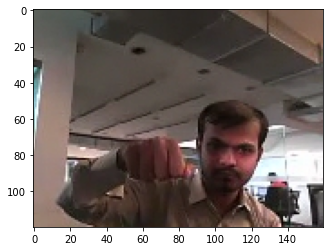

In [166]:
plt.imshow(sample)

In [167]:
sample.shape

(120, 160, 3)

In [168]:
# def crop_img(image):
#     height = image.shape[0]
#     width = image.shape[1]
#     height_center = height//2
#     width_center = width//2
# #     print(height_center)
# #     print(width_center)
#     return image[(height_center-60):(height_center+70), (width_center-50):(width_center+70)]



def crop_and_resize_img(image):
    if image.shape[0] == 360:
        image = resize(image,(120,120))
    height = image.shape[0]
    width = image.shape[1]
    height_center = height//2
    width_center = width//2
    image = image[(height_center-60):(height_center+70), (width_center-50):(width_center+70)]
#     print(image.shape)
    image = resize(image,(50,50))
    return image

In [169]:
x = sample
# print(x.shape)

x = crop_and_resize_img(x)
# print(x.shape)
# print(sample.shape)

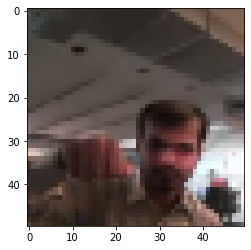

In [170]:
plt.imshow(x)

In [171]:
total_frames=30
num_frames=16

In [172]:
def generator(source_path, folder_list, batch_size):
#     print( 'Source path = ', source_path, '; batch size =', batch_size)
#     print('len of folder_list = ', len(folder_list))
    
    img_idx = np.round(np.linspace(0, total_frames-1,num_frames)).astype(int)#create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(folder_list)//batch_size# calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,len(img_idx),50,50,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    image = crop_and_resize_img(image)
#                     image = resize(image,(50,50))
                    
                    image = image/255
                    batch_data[folder,idx,:,:,0] = image[:,:,0]#normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1]#normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2]#normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        left_out_img = len(folder_list)%batch_size
        batch+=1
        if left_out_img!=0:
            batch_data = np.zeros((left_out_img,len(img_idx),50,50,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((left_out_img,5)) # batch_labels is the one hot representation of the output
            for folder in range(left_out_img): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    image = crop_and_resize_img(image)
#                     image = resize(image,(50,50))
                    image = image/255
                    batch_data[folder,idx,:,:,0] = image[:,:,0]#normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1]#normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2]#normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        
        # write the code for the remaining data points which are left after full batches

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [173]:
curr_dt_time = datetime.datetime.now()
# train_path = '/notebooks/storage/Final_data/Collated_training/train'
train_path='D:/MS_in_ML_and_AI/Jupyter/Gesture Recognition/datasets/Project_data/train'
val_path='D:/MS_in_ML_and_AI/Jupyter/Gesture Recognition/datasets/Project_data/val'
# val_path = '/notebooks/storage/Final_data/Collated_training/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs =30 #50(1st) choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 30


## Model1
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [174]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout,LSTM
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

#write your model here
num_classes = 5
model = Sequential()

model.add(TimeDistributed(Conv2D(16,(3,3), padding='same', activation='relu'),
                         input_shape=(num_frames,50,50,3)))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
# model.add(TimeDistributed(Dropout(0.5)))

# model.add(TimeDistributed(Conv2D(32,(2,2), padding='same')))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(TimeDistributed(Conv2D(32,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
# model.add(TimeDistributed(Dropout(0.5)))

model.add(TimeDistributed(Conv2D(64,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
# model.add(TimeDistributed(Dropout(0.5)))

model.add(TimeDistributed(Conv2D(128,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

model.add(TimeDistributed(Conv2D(256,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
# model.add(TimeDistributed(Dropout(0.5)))


model.add(TimeDistributed(Flatten()))
# model.add(LSTM(64, return_sequences=False, dropout=0.25))
model.add(LSTM(64, dropout=0.25))

model.add(Dense(64))
model.add(Dropout(0.25))

model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [175]:
optimiser = optimizers.Adam()#Adam(1st)write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_122 (TimeDi (None, 16, 50, 50, 16)    448       
_________________________________________________________________
time_distributed_123 (TimeDi (None, 16, 50, 50, 16)    64        
_________________________________________________________________
time_distributed_124 (TimeDi (None, 16, 25, 25, 16)    0         
_________________________________________________________________
time_distributed_125 (TimeDi (None, 16, 25, 25, 32)    4640      
_________________________________________________________________
time_distributed_126 (TimeDi (None, 16, 25, 25, 32)    128       
_________________________________________________________________
time_distributed_127 (TimeDi (None, 16, 12, 12, 32)    0         
_________________________________________________________________
time_distributed_128 (TimeDi (None, 16, 12, 12, 64)   

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [176]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)
# print(val_generator))

In [177]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'


checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, cooldown=1,verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [178]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

### Model 1 With LSTM,16 frames, 10 Epochs and batch size=8

In [179]:
# batch_size=10
# num_epochs=20
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/30
83/83 [==============================] - 103s 1s/step - loss: 1.3535 - categorical_accuracy: 0.4253 - val_loss: 2.1291 - val_categorical_accuracy: 0.2100

Epoch 00001: saving model to model_init_2021-06-2517_19_04.568290\model-00001-1.35346-0.42534-2.12910-0.21000.h5
Epoch 2/30
83/83 [==============================] - 94s 1s/step - loss: 1.0398 - categorical_accuracy: 0.5867 - val_loss: 2.4374 - val_categorical_accuracy: 0.1400

Epoch 00002: saving model to model_init_2021-06-2517_19_04.568290\model-00002-1.03981-0.58673-2.43737-0.14000.h5
Epoch 3/30
83/83 [==============================] - 97s 1s/step - loss: 0.8796 - categorical_accuracy: 0.6727 - val_loss: 2.6720 - val_categorical_accuracy: 0.1800

Epoch 00003: saving model to model_init_2021-06-2517_19_04.568290\model-00003-0.87957-0.67270-2.67195-0.18000.h5

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/30
83/83 [==============================] - 100s 1s/step - loss: 0.5923 - ca

83/83 [==============================] - 97s 1s/step - loss: 0.0144 - categorical_accuracy: 1.0000 - val_loss: 0.5693 - val_categorical_accuracy: 0.8100

Epoch 00028: saving model to model_init_2021-06-2517_19_04.568290\model-00028-0.01444-1.00000-0.56929-0.81000.h5

Epoch 00028: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.
Epoch 29/30
83/83 [==============================] - 98s 1s/step - loss: 0.0191 - categorical_accuracy: 0.9985 - val_loss: 0.6527 - val_categorical_accuracy: 0.8300

Epoch 00029: saving model to model_init_2021-06-2517_19_04.568290\model-00029-0.01907-0.99849-0.65270-0.83000.h5
Epoch 30/30
83/83 [==============================] - 99s 1s/step - loss: 0.0151 - categorical_accuracy: 0.9985 - val_loss: 0.6185 - val_categorical_accuracy: 0.8100

Epoch 00030: saving model to model_init_2021-06-2517_19_04.568290\model-00030-0.01508-0.99849-0.61855-0.81000.h5

Epoch 00030: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.


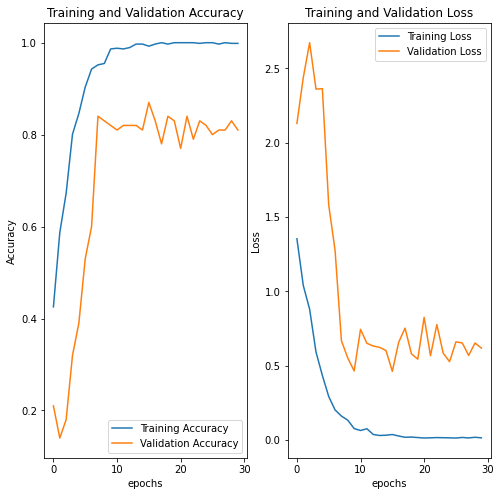

In [180]:
def plot_accu(history, num_epochs):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(num_epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.show()

plot_accu(history, num_epochs)

### Model2 with GRU, batch size=8, n_frames=16, epochs=20

In [181]:
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout,LSTM
# from tensorflow.keras.layers import Conv3D, MaxPooling3D, Conv2D,MaxPooling2D
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras import optimizers
# from tensorflow.keras.regularizers import l2

#write your model here
batch_size=8
num_epochs=20
num_classes = 5
model = Sequential()

model.add(TimeDistributed(Conv2D(16,(3,3), padding='same', activation='relu'),
                         input_shape=(num_frames,50,50,3)))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
# model.add(TimeDistributed(Dropout(0.5)))

# model.add(TimeDistributed(Conv2D(32,(2,2), padding='same')))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(TimeDistributed(Conv2D(32,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
# model.add(TimeDistributed(Dropout(0.5)))

model.add(TimeDistributed(Conv2D(64,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
# model.add(TimeDistributed(Dropout(0.5)))

model.add(TimeDistributed(Conv2D(128,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

model.add(TimeDistributed(Conv2D(256,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
# model.add(TimeDistributed(Dropout(0.5)))


model.add(TimeDistributed(Flatten()))
model.add(GRU(64, dropout=0.25))
model.add(Dense(64))
model.add(Dropout(0.25))

model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [182]:
optimiser = optimizers.Adam()#Adam(1st)write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_138 (TimeDi (None, 16, 50, 50, 16)    448       
_________________________________________________________________
time_distributed_139 (TimeDi (None, 16, 50, 50, 16)    64        
_________________________________________________________________
time_distributed_140 (TimeDi (None, 16, 25, 25, 16)    0         
_________________________________________________________________
time_distributed_141 (TimeDi (None, 16, 25, 25, 32)    4640      
_________________________________________________________________
time_distributed_142 (TimeDi (None, 16, 25, 25, 32)    128       
_________________________________________________________________
time_distributed_143 (TimeDi (None, 16, 12, 12, 32)    0         
_________________________________________________________________
time_distributed_144 (TimeDi (None, 16, 12, 12, 64)   

In [183]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [184]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'


checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, cooldown=1,verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [185]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [186]:

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/20
83/83 [==============================] - 99s 1s/step - loss: 1.3409 - categorical_accuracy: 0.4615 - val_loss: 2.2745 - val_categorical_accuracy: 0.2000

Epoch 00001: saving model to model_init_2021-06-2517_19_04.568290\model-00001-1.34091-0.46154-2.27451-0.20000.h5
Epoch 2/20
83/83 [==============================] - 94s 1s/step - loss: 0.9274 - categorical_accuracy: 0.6471 - val_loss: 3.3864 - val_categorical_accuracy: 0.1600

Epoch 00002: saving model to model_init_2021-06-2517_19_04.568290\model-00002-0.92744-0.64706-3.38641-0.16000.h5
Epoch 3/20
83/83 [==============================] - 95s 1s/step - loss: 0.8426 - categorical_accuracy: 0.6787 - val_loss: 2.4263 - val_categorical_accuracy: 0.3400

Epoch 00003: saving model to model_init_2021-06-2517_19_04.568290\model-00003-0.84257-0.67873-2.42629-0.34000.h5

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/20
83/83 [==============================] - 97s 1s/step - loss: 0.5470 - cate

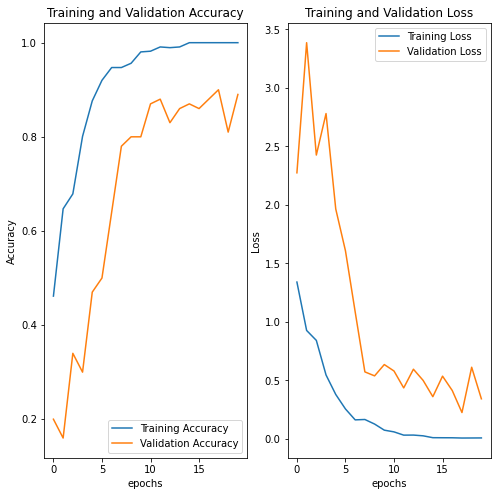

In [187]:
plot_accu(history, num_epochs)

### Model 3 Adding dropouts to reduce the overfitting
- batch size = 8
- epochs = 20 
- frames = 16

In [188]:
batch_size=8
num_epochs=20
num_classes = 5
model = Sequential()

model.add(TimeDistributed(Conv2D(16,(3,3), padding='same', activation='relu'),
                         input_shape=(num_frames,50,50,3)))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
# model.add(TimeDistributed(Dropout(0.5)))

# model.add(TimeDistributed(Conv2D(32,(2,2), padding='same')))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(TimeDistributed(Conv2D(32,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
# model.add(TimeDistributed(Dropout(0.5)))

model.add(TimeDistributed(Conv2D(64,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Dropout(0.5)))

model.add(TimeDistributed(Conv2D(128,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Dropout(0.7)))


model.add(TimeDistributed(Conv2D(256,(3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Dropout(0.5)))


model.add(TimeDistributed(Flatten()))
model.add(LSTM(64, return_sequences=False, dropout=0.25))
model.add(Dense(64))
model.add(Dropout(0.25))

model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [189]:
optimiser = optimizers.Adam()#Adam(1st)write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_154 (TimeDi (None, 16, 50, 50, 16)    448       
_________________________________________________________________
time_distributed_155 (TimeDi (None, 16, 50, 50, 16)    64        
_________________________________________________________________
time_distributed_156 (TimeDi (None, 16, 25, 25, 16)    0         
_________________________________________________________________
time_distributed_157 (TimeDi (None, 16, 25, 25, 32)    4640      
_________________________________________________________________
time_distributed_158 (TimeDi (None, 16, 25, 25, 32)    128       
_________________________________________________________________
time_distributed_159 (TimeDi (None, 16, 12, 12, 32)    0         
_________________________________________________________________
time_distributed_160 (TimeDi (None, 16, 12, 12, 64)   

In [190]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [191]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'


checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, cooldown=1,verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [192]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [193]:

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/20
83/83 [==============================] - 102s 1s/step - loss: 1.6107 - categorical_accuracy: 0.2262 - val_loss: 1.6845 - val_categorical_accuracy: 0.2100

Epoch 00001: saving model to model_init_2021-06-2517_19_04.568290\model-00001-1.61073-0.22624-1.68447-0.21000.h5
Epoch 2/20
83/83 [==============================] - 99s 1s/step - loss: 1.4484 - categorical_accuracy: 0.3605 - val_loss: 1.9936 - val_categorical_accuracy: 0.2000

Epoch 00002: saving model to model_init_2021-06-2517_19_04.568290\model-00002-1.44841-0.36048-1.99362-0.20000.h5
Epoch 3/20
83/83 [==============================] - 100s 1s/step - loss: 1.2947 - categorical_accuracy: 0.4510 - val_loss: 2.1683 - val_categorical_accuracy: 0.2400

Epoch 00003: saving model to model_init_2021-06-2517_19_04.568290\model-00003-1.29475-0.45098-2.16830-0.24000.h5

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/20
83/83 [==============================] - 100s 1s/step - loss: 1.1388 - c

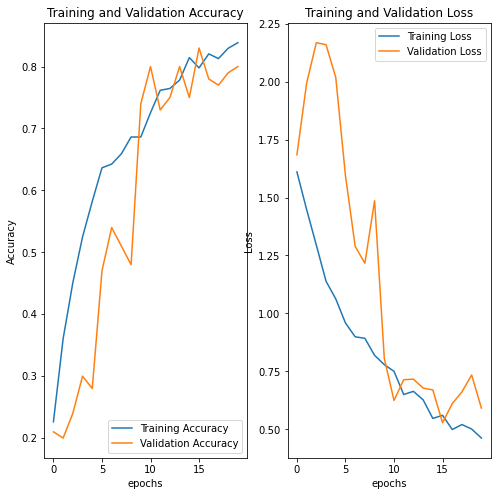

In [194]:
plot_accu(history, num_epochs)

### Model 4 

### Model 5